# Project: Investigation of NICS data and U.S. census data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have chosen to investigate the NICS/FBI Gun data with aim of comparing it to state-level census data, specifically correlations between total number of gun purchased in each state from 2016 and two key socioeconomic variables, rurality (population density) and educational attainment.

Upon initial viewing of these two data sets in Excel, I saw that the individual states were columns in the census data .csv file, and as rows in the gun_data Excel spreadsheet. Anticipating that might pose a challenge, I made the decision to transpose the rows and columns in the census data. Prior to importing the census .csv file, I made a separate copy (in Excel) removing rows 66 and below as those rows contained notes/footnotes that were not part of the tabular data, and did not want to 'read' that into our dataframe.

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Here I will take an initial first look at the census and gun data dataframes. This is where I will

* first discover the variations in how some states report percentages, which will be corrected below in *Data Cleaning (Census Data)*
* check for duplicates
* transpose columns and rows of the census data (since they're transposed in gun_data.csv)
* check for appropriateness of data types

### General Properties

In [2]:
# Load data to take a first look
df_census_input = pd.read_csv('census_data.csv')
df_census_input.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454.000,6651194.000,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195.000,6346298.000,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180.000,6346105.000,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
# visually locate states that present percentages numerically with decimals (versus as percentages)
df_census_input.query('Fact == "Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015"')

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
35,"Bachelor's degree or higher, percent of person...",NaN,23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%


In [4]:
# quick check for duplicates
sum(df_census_input.duplicated())

0

In [5]:
# Tranposing columns and rows
import csv
a = zip(*csv.reader(open("census_data.csv", "r")))
csv.writer(open("census_data_tp.csv", "w")).writerows(a)
df_census_tp = pd.read_csv('census_data_tp.csv')

In [6]:
# import gun_data.csv (after having converted gun_data.xlsx into csv)
df_guns = pd.read_csv('gun_data.csv')

In [7]:
df_guns.shape

(12485, 27)

In [8]:
df_guns.head()

,state,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,2017-09,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,Alaska,2017-09,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,Arizona,2017-09,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,Arkansas,2017-09,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,California,2017-09,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [9]:
# look to see if data is in appropriate data types
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
state                        12485 non-null object
month                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Data Cleaning (Census Data)
* examine dataframe to see which states presented their percentage data as percents instead of decimals)
* find all states/column pairs that relate percents as decimals and then multiply them, in place,by 100 to match the other 38 states
* from the census data, remove all extraneous characters (comas, percent signs, dollar signs) from string data prior to converting those fields from strings to floats
* column removal/renaming

In [10]:
df_census_tp.shape

(51, 65)

In [11]:
df_census_tp.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


In [12]:
# quick view of dataframe to get quick look at variation in states' reporting of percentages
df_census_tp[~df_census_tp["Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015"].str.contains('%', na=False)]

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,New Mexico,2081015,2059198,0.011,2059179,0.062,0.07,0.236,0.252,0.165,...,121279,151363,71132,59044,60622,83857,14096,128693,17,121298.15
32,New York,19745289,19378110,0.019,19378102,0.059,0.06,0.212,0.223,0.154,...,1685636,2008988,1139910,725709,709021,1248304,137532,1811544,411.2,47126.4
33,North Carolina,10146788,9535688,0.064,9535483,0.06,0.066,0.227,0.239,0.155,...,722639,805985,435677,287058,183380,603182,86571,684743,196.1,48617.91
34,North Dakota,757952,672591,0.127,672591,0.073,0.066,0.233,0.223,0.145,...,53263,68270,37016,20316,3190,62271,6584,56904,9.7,69000.8
35,Ohio,11614373,11536727,0.007,11536504,0.06,0.062,0.225,0.237,0.162,...,763418,904814,510078,306824,122653,759569,91316,776193,282.3,40860.69
36,Oklahoma,3923561,3751615,0.046,3751351,0.068,0.07,0.245,0.248,0.15,...,276218,327229,174395,105168,64875,249027,36273,273491,54.7,68594.92
37,Oregon,4093465,3831072,0.068,3831074,0.058,0.062,0.212,0.226,0.168,...,278839,339305,165691,123015,41456,285028,30918,288790,39.9,95988.01
38,Pennsylvania,12784227,12702857,0.006,12702379,0.056,0.057,0.209,0.22,0.174,...,811890,975453,579400,304803,131512,818858,97969,837792,283.9,44742.7
39,Rhode Island,1056426,1052940,0.003,1052567,0.052,0.055,0.197,0.213,0.165,...,76747,94642,54651,30484,14737,77042,9904,79837,1018.1,1033.81


In [13]:
# find all states/column pairs that relate percents as decimals
df_census_tp.iloc[31:43, [0, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 33, 34, 35, 36, 37, 38, 39, 40, 50]]

,Fact,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)",...,"Owner-occupied housing unit rate, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Persons in poverty, percent"
31,New Mexico,0.011,0.07,0.236,0.252,0.165,0.132,0.505,0.506,0.826,...,0.681,0.857,0.357,0.842,0.263,0.101,0.108,0.591,0.549,0.198
32,New York,0.019,0.06,0.212,0.223,0.154,0.135,0.514,0.516,0.699,...,0.536,0.891,0.304,0.856,0.342,0.074,0.07,0.633,0.587,0.147
33,North Carolina,0.064,0.066,0.227,0.239,0.155,0.129,0.514,0.513,0.71,...,0.651,0.847,0.112,0.858,0.284,0.096,0.122,0.618,0.577,0.154
34,North Dakota,0.127,0.066,0.233,0.223,0.145,0.145,0.487,0.495,0.879,...,0.641,0.822,0.056,0.917,0.277,0.068,0.081,0.693,0.65,0.107
35,Ohio,0.007,0.062,0.225,0.237,0.162,0.141,0.51,0.512,0.825,...,0.663,0.853,0.067,0.891,0.261,0.099,0.066,0.633,0.59,0.146
36,Oklahoma,0.046,0.07,0.245,0.248,0.15,0.135,0.505,0.505,0.746,...,0.661,0.826,0.098,0.869,0.241,0.113,0.161,0.611,0.557,0.163
37,Oregon,0.068,0.062,0.212,0.226,0.168,0.139,0.505,0.505,0.874,...,0.613,0.819,0.151,0.898,0.308,0.102,0.073,0.621,0.576,0.133
38,Pennsylvania,0.006,0.057,0.209,0.22,0.174,0.154,0.51,0.513,0.824,...,0.692,0.88,0.106,0.892,0.286,0.095,0.067,0.628,0.583,0.129
39,Rhode Island,0.003,0.055,0.197,0.213,0.165,0.144,0.514,0.517,0.844,...,0.601,0.866,0.214,0.862,0.319,0.089,0.051,0.655,0.616,0.128
40,South Carolina,0.073,0.065,0.221,0.234,0.167,0.137,0.515,0.514,0.685,...,0.686,0.847,0.069,0.856,0.258,0.103,0.119,0.601,0.562,0.153


In [14]:
# Get rid of all the commas, dollar signs and percent symbols in the numbers
df_census_tp.replace({',': '', '%': '', '\$': ''}, regex=True, inplace=True)

In [15]:
# Delete the 'Fact Note' column
df_census_tp.drop(df_census_tp.index[0], inplace=True)   # Careful! Only re-run this line
                                                         # if you've re-run the transposition
                                                         # or you'll keep chopping rows off
                                                         # the top!

In [16]:
# Rename the (what will become the) 'Fact' column as 'State'
# (because when we 'flip' i.e. transpose rows/columns, we'll need that as a column header)
df_census_tp.rename(columns={'Fact': 'State'}, inplace=True)

In [17]:
"""Let's take a look at ALL the data to see that all the extraeous characters have been removed
   before converting it all to numeric, and also check that "Fact" column was successfully renames
   """

pd.set_option('display.max_columns', None)
df_census_tp.head()

,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
1,Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,363170,3.50,2230185,2171853,68.70,125500,1139,345,717,15001,1848325,2.55,85.30,5.20,84.30,23.50,11.80,10.70,58.00,53.00,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,17.10,98540,1634391,67370353,1.90,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
2,Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,47.70,48.00,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20,69323,7.40,310658,306967,63.40,250000,1827,554,1146,1503,250969,2.81,80.90,16.20,92.10,28.00,8.10,15.50,67.70,65.00,2221335,6375483,D,5216303,10474275,14320,19.0,72515,33413,9.90,20907,267999,15643303,0.40,55521,68032,35402,22141,13688,51147,7953,56091,1.2,5706

In [18]:
# drop columns I am not going to use
df_census_tp.drop(df_census_tp.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 55, 56, 57, 58, 59, 60, 61, 62, 64]], axis=1, inplace=True)

In [19]:
# convert everything to numeric
df_census = df_census_tp.apply(pd.to_numeric, errors='ignore')

In [20]:
# confirm data is numeric
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 14 columns):
State                                                                                    50 non-null object
Population estimates, July 1, 2016,  (V2016)                                             50 non-null int64
Population estimates base, April 1, 2010,  (V2016)                                       50 non-null int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    50 non-null float64
Median value of owner-occupied housing units, 2011-2015                                  50 non-null int64
High school graduate or higher, percent of persons age 25 years+, 2011-2015              50 non-null float64
Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015                 50 non-null float64
Persons  without health insurance, under age 65 years, percent                           50 non-null float64
Median household income (in 2015

In [21]:
# Making sure we have the right number of rows
df_census_tp.shape

(50, 14)

In [22]:
# within this new paired down dataframe, let's take another look at the rows/columns containing the 
# percentage data that will need to be converted (i.e. multipled by 100) to match the majority of other states
df_census.iloc[30:42, [0, 3, 5, 6, 7]]

,State,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons without health insurance, under age 65 years, percent"
31,New Mexico,0.011,0.842,0.263,0.108
32,New York,0.019,0.856,0.342,0.070
33,North Carolina,0.064,0.858,0.284,0.122
34,North Dakota,0.127,0.917,0.277,0.081
35,Ohio,0.007,0.891,0.261,0.066
36,Oklahoma,0.046,0.869,0.241,0.161
37,Oregon,0.068,0.898,0.308,0.073
38,Pennsylvania,0.006,0.892,0.286,0.067
39,Rhode Island,0.003,0.862,0.319,0.051
40,South Carolina,0.073,0.856,0.258,0.119


In [23]:
# correct percent columns for these states (ie multiply by 100)
df_census.iloc[30:42, [3, 5, 6, 7]] = df_census.iloc[30:42, [3, 5, 6, 7]].mul(100)

In [24]:
# confirm those values are corrected
df_census.iloc[30:42, [0, 3, 5, 6, 7]]

,State,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons without health insurance, under age 65 years, percent"
31,New Mexico,1.1,84.2,26.3,10.8
32,New York,1.9,85.6,34.2,7.0
33,North Carolina,6.4,85.8,28.4,12.2
34,North Dakota,12.7,91.7,27.7,8.1
35,Ohio,0.7,89.1,26.1,6.6
36,Oklahoma,4.6,86.9,24.1,16.1
37,Oregon,6.8,89.8,30.8,7.3
38,Pennsylvania,0.6,89.2,28.6,6.7
39,Rhode Island,0.3,86.2,31.9,5.1
40,South Carolina,7.3,85.6,25.8,11.9


### Data Cleaning (Gun Data)
* extract the 4-number *year* from the `[‘month’]` column as a new separate field/column
* select records limited to 2010-2016 (to match census timeframe)
* using `groupby`, aggregate data by state
* re-indexed dataframe in order to restore my index (after `groupby` converted my `[‘State’]` column into its index
* column removal/renaming
* Hawaii and Mariana Islands data was incomplete, so was removed from dataset

In [25]:
# Make new column, "Year', with first four characters of 'month' column
df_guns.insert(loc=1, column='Year', value=df_guns.month.str[:4])
df_guns.head()

,state,Year,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,2017,2017-09,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,Alaska,2017,2017-09,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,Arizona,2017,2017-09,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,Arkansas,2017,2017-09,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,California,2017,2017-09,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [26]:
# select 2010-2016 gun data to somewhat match range of years of census data
df_guns_sum = df_guns.loc[df_guns['Year'].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016'])]

In [27]:
# take a look at data by state, by year
df_guns_sum.groupby(['state', 'Year']).sum();

In [28]:
# sum of by state
df_guns_by_state = df_guns_sum.groupby(['state']).sum()

In [29]:
# reset index
df_guns_by_state.reset_index(level=0, inplace=True)

In [30]:
# start deleting columns I don't need/want
df_guns_by_state.drop(df_guns_by_state.columns[[1, 2]], axis=1, inplace=True)

In [31]:
# capitalizing "state" column so it matches with census data
df_guns_by_state.rename(columns={'state': 'State'}, inplace=True)

In [32]:
# finishing deleting unwanted columns prior to merge with census dataframe
df_guns_by_state.drop(df_guns_by_state.columns[5:], axis=1, inplace=True)

In [33]:
# add total column
df_guns_by_state['gun_total'] = df_guns_by_state['handgun'] + df_guns_by_state['long_gun'] + df_guns_by_state['other'] 

In [34]:
# remove Hawaii and Mariana Islands from dataset
df_guns_by_state = df_guns_by_state[df_guns_by_state.State != 'Hawaii']
df_guns_by_state = df_guns_by_state[df_guns_by_state.State != 'Mariana Islands']

In [35]:
# check for duplicates
sum(df_guns_by_state.duplicated())

0

In [36]:
# number rows with missing data
df_guns_by_state.shape[0] - df_guns_by_state.dropna().shape[0]

0

### Merge Tables
* merged (inner join) the gun total column from the gun data dataframe with the census dataframe
* in effort to control for population, created new calculated field of total gun purchases over 7-year period divided by average of that state's population (2016 population + 2010 population divided by two)
* calculated a new field 
* visually display that new field (guns bought per person), with a bar graph, ranked by purchases
* view tabular output of correlation coefficients of all data in new merged dataframe

In [37]:
# merging total gun purchases (all types) 2010-2016 with selected socioeconomic census data
df_merge = pd.merge(df_census, df_guns_by_state.iloc[:, [0, 5]], on='State', how='inner')

In [38]:
df_merge.head()

,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Median value of owner-occupied housing units, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons without health insurance, under age 65 years, percent","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Population per square mile, 2010",gun_total
0,Alabama,4863300,4780131,1.7,125500,84.3,23.5,10.7,43623,17.1,1634391,67370353,1.90,94.4,2370676.0
1,Alaska,741894,710249,4.5,250000,92.1,28.0,15.5,72515,9.9,267999,15643303,0.40,1.2,515543.0
2,Arizona,6931071,6392301,8.4,167500,86.0,27.5,11.9,50255,16.4,2295186,102671393,2.40,56.3,1621781.0
3,Arkansas,2988248,2916025,2.5,111400,84.8,21.1,9.3,41371,17.2,1003113,39451191,1.10,56.0,1066346.0
4,California,39250017,37254522,5.4,385500,81.8,31.4,8.3,61818,14.3,14325377,856954246,3.50,239.1,5994545.0


In [39]:
# calculate average of 2010 and 2016 census estimates
pop_mean = (df_merge.iloc[:, 1] + df_merge.iloc[:, 2]) / 2

# create guns_purchases_per_person field
df_merge['guns_purchases_per_person'] =  df_merge['gun_total'] / pop_mean

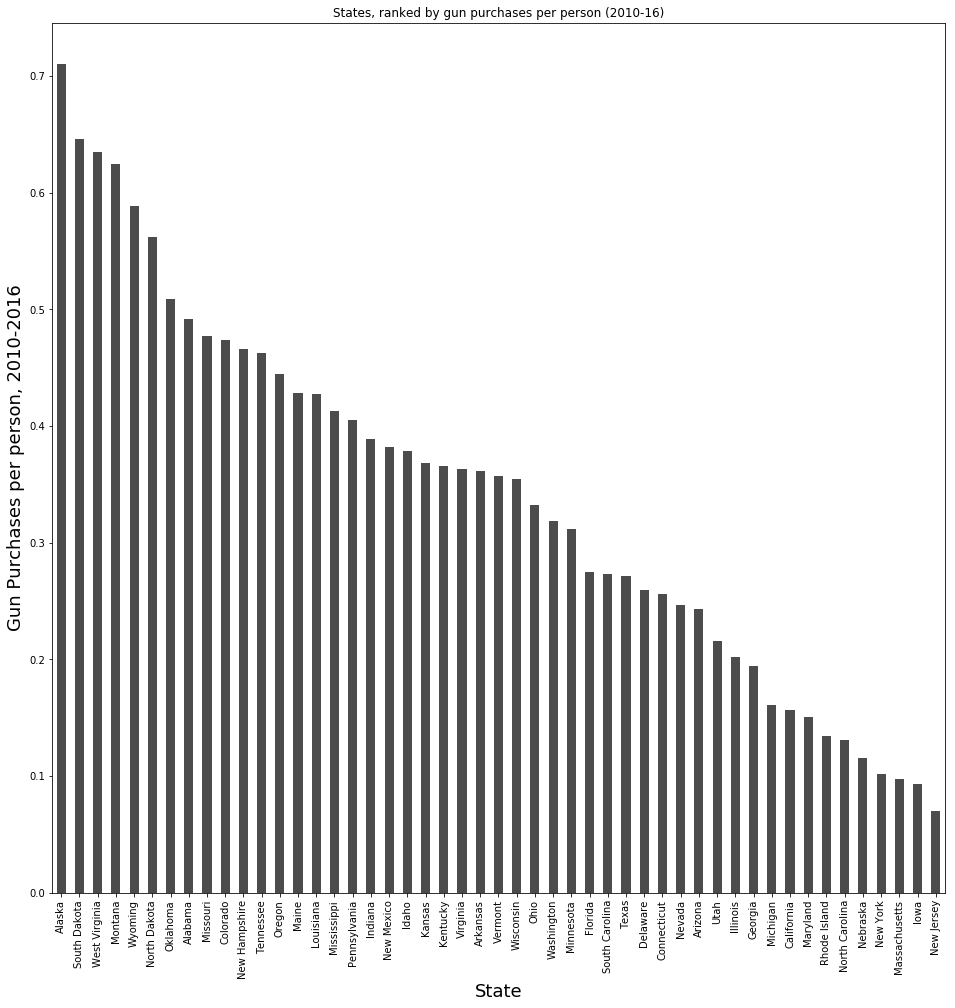

In [40]:
# With this new calculated field, visually rank states by gun purchases per person

df_merge_sort = df_merge.sort_values('guns_purchases_per_person',ascending=False)
df_merge_sort.index = df_merge_sort['State']
plt.xlabel('State', fontsize=18)
plt.ylabel('Gun Purchases per person, 2010-2016', fontsize=18)
df_merge_sort["guns_purchases_per_person"].plot(kind="bar", figsize=(16,16), title='States, ranked by gun purchases per person (2010-16)', color=['black'], alpha=.7);

In [41]:
df_merge.shape

(49, 16)

In [42]:
# will look at correlation coefficients of gun purchase data compared to census data
df_merge.corr(method='pearson')

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Median value of owner-occupied housing units, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons without health insurance, under age 65 years, percent","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Population per square mile, 2010",gun_total,guns_purchases_per_person
"Population estimates, July 1, 2016, (V2016)",1.000000,0.999071,0.157953,0.297242,-0.474282,0.127401,0.153967,0.088840,0.060908,0.996450,0.982728,0.164212,0.838033,-0.402901
"Population estimates base, April 1, 2010, (V2016)",0.999071,1.000000,0.128768,0.301654,-0.470538,0.130487,0.131264,0.091848,0.053330,0.997398,0.986138,0.173845,0.831676,-0.408531
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.157953,0.128768,1.000000,0.086732,0.013547,0.044514,0.424511,0.078477,-0.077453,0.133155,0.107229,-0.251522,0.168055,0.012781
"Median value of owner-occupied housing units, 2011-2015",0.297242,0.301654,0.086732,1.000000,0.192268,0.791323,-0.342627,0.817376,-0.136129,0.311729,0.411005,0.560570,-0.011571,-0.321989
"High school graduate or higher, percent of persons age 25 years+, 2011-2015",-0.474282,-0.470538,0.013547,0.192268,1.000000,0.459858,-0.371542,0.468181,-0.210709,-0.436109,-0.412986,-0.064097,-0.444701,0.207249
"Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",0.127401,0.130487,0.044514,0.791323,0.459858,1.000000,-0.439704,0.821974,-0.216704,0.163368,0.226462,0.523625,-0.072990,-0.392518
"Persons without health insurance, under age 65 years, percent",0.153967,0.131264,0.424511,-0.342627,-0.371542,-0.439704,1.000000,-0.307475,0.141239,0.110545,0.049508,-0.355248,0.271218,0.263701
"Median household income (in 2015 dollars), 2011-2015",0.088840,0.091848,0.078477,0.817376,0.468181,0.821974,-0.307475,1.000000,-0.139262,0.119274,0.192071,0.514403,-0.122420,-0.260567
"Persons in poverty, percent",0.060908,0.053330,-0.077453,-0.136129,-0.210709,-0.216704,0.141239,-0.139262,1.000000,0.039799,0.021901,-0.161152,0.065066,-0.019441
"Total employment, 2015",0.996450,0.997398,0.133155,0.311729,-0.436109,0.163368,0.110545,0.119274,0.039799,1.000000,0.987801,0.190373,0.834465,-0.419123


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Any correlation between gun purchasing (2010-2016) and states' population densities?

In [43]:
# standard correlation coefficient between gun total gun purchases (from 2010-2016) per person and 
# each state's population density
df_merge['guns_purchases_per_person'].corr(df_merge['Population per square mile, 2010'])

-0.54919910631924207

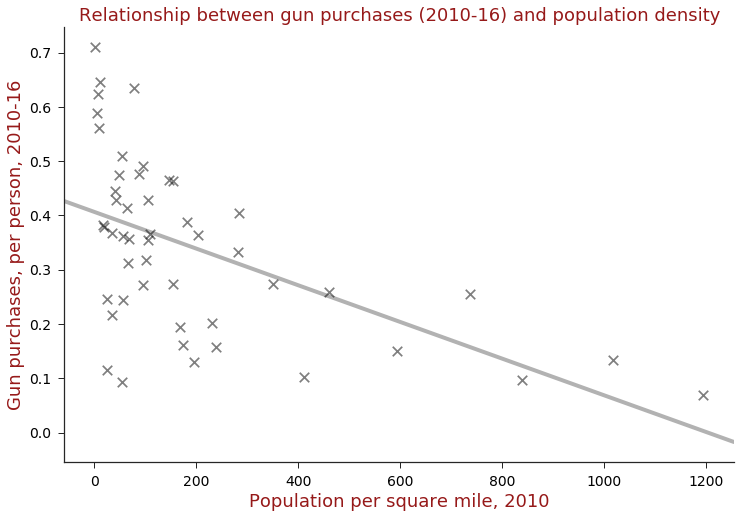

In [44]:
sns.set(style="ticks")

plot1 = sns.regplot(y="guns_purchases_per_person", x="Population per square mile, 2010", data=df_merge, ci = False,
    scatter_kws={"color":"black","alpha":0.5,"s":90},
    line_kws={"color":"black","alpha":0.3,"lw":4},marker="x")

sns.despine()
plot1.figure.set_size_inches(12,8)
plot1.axes.set_title('Relationship between gun purchases (2010-16) and population density', fontsize=18,color="darkred",alpha=0.9)
plot1.set_ylabel("Gun purchases, per person, 2010-16",size = 18,color="darkred",alpha=0.9)
plot1.set_xlabel("Population per square mile, 2010",size = 18,color="darkred",alpha=0.9)
plot1.tick_params(labelsize=14,labelcolor="black")

#### Answer: The volume of gun purchasing was negatively correlated (R = -0.55) with population per square mile.

### Research Question 2: Any correlation between gun purchasing (2010-2016) and states' percent of people with Bachelor's degrees?

In [45]:
# standard correlation coefficient between gun total gun purchases (from 2010-2016) per person and 
# each state's percent of people attaining college degrees
df_merge['guns_purchases_per_person'].corr(df_merge['Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015'])

-0.39251774433167069

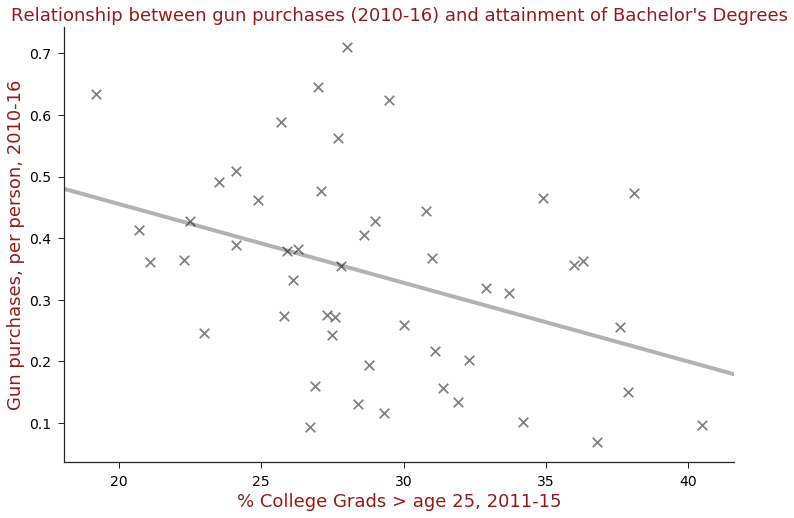

In [46]:
sns.set(style="ticks")

plot2 = sns.regplot(x="Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015", y="guns_purchases_per_person", data=df_merge, ci = False,
    scatter_kws={"color":"black","alpha":0.5,"s":90},
    line_kws={"color":"black","alpha":0.3,"lw":4},marker="x")

sns.despine()
plot2.figure.set_size_inches(12,8)
plot2.axes.set_title('Relationship between gun purchases (2010-16) and attainment of Bachelor\'s Degrees', fontsize=18,color="darkred",alpha=0.9)
plot2.set_xlabel("% College Grads > age 25, 2011-15",size = 18,color="darkred",alpha=0.9)
plot2.set_ylabel("Gun purchases, per person, 2010-16",size = 18,color="darkred",alpha=0.9)
plot2.tick_params(labelsize=14,labelcolor="black")

#### Answer: The volume of gun purchasing was negatively correlated with states' percents of people with Bachelor's degrees (R = -0.40).

<a id='conclusions'></a>
## Conclusions
These data sets presented more challenges to work with than I anticipated, starting with the inversion of the x- and y-axes between the two data sets requiring transposition of the axes in the gun_data dataframe. Then there were 12 states that presented their percentage data as decimals that, once converted from strings to floats, required in-place multiplication by 100 to match the way the remaining 38 states presented their percentages. These data sets also encapsulated different time frames, and although direct comparison was not possible, I was able to limit the gun data to the seven-year timeframe that I believe served as a fair comparison to the census data i.e. years 2010 to 2016. Because Hawaii had a lot of missing gun data, it was eliminated entirely from the merged data set. There was also the challenge of gun data being in whole numbers, which when used to compare with census data what often serve more as a proxy for population then true gun buying habits, so gun purchases had to be divided by approximated population in a state in order to have a meaningful “guns purchases per person” metric.

These challenges aside, I was able to discover what I believe are some meaningful correlations between the volume of gun purchasing from 2010 to 2016 and if you socioeconomic factors found in the census data. There was a moderate negative correlation between (R = -0.55) gun purchasing and population density, revealing that more rural states tended to have more gun purchases per person from 2010-2016. There was also a negative correlation between gun purchasing and attainment of bachelor's degrees (R = -0.4).

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0